In [16]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from qtaim_embed.models.utils import load_graph_level_model_from_config
from qtaim_embed.data.dataloader import DataLoaderMoleculeGraphTask
from qtaim_embed.core.dataset import HeteroGraphGraphLabelDataset
from qtaim_embed.models.utils import get_test_train_preds_as_df, test_and_predict_libe


In [60]:
qtaim_keys_high = {
    "atom": [
        "extra_feat_atom_Lagrangian_K", 
      "extra_feat_atom_Hamiltonian_K",
       "extra_feat_atom_e_density", "extra_feat_atom_lap_e_density",
       "extra_feat_atom_e_loc_func", "extra_feat_atom_ave_loc_ion_E",
       "extra_feat_atom_delta_g_promolecular", "extra_feat_atom_delta_g_hirsh",
       "extra_feat_atom_esp_nuc", "extra_feat_atom_esp_e",
       "extra_feat_atom_esp_total", "extra_feat_atom_grad_norm",
       "extra_feat_atom_lap_norm", "extra_feat_atom_eig_hess",
       "extra_feat_atom_det_hessian", "extra_feat_atom_ellip_e_dens",
       "extra_feat_atom_eta","extra_feat_atom_energy_density"
    ],
    "bond": [
        "bond_length",
       "extra_feat_bond_Lagrangian_K", 
       "extra_feat_bond_Hamiltonian_K", "extra_feat_bond_e_density",
       "extra_feat_bond_lap_e_density", "extra_feat_bond_e_loc_func",
       "extra_feat_bond_ave_loc_ion_E", "extra_feat_bond_delta_g_promolecular",
       "extra_feat_bond_delta_g_hirsh", "extra_feat_bond_esp_nuc",
       "extra_feat_bond_esp_e", "extra_feat_bond_esp_total",
       "extra_feat_bond_grad_norm", "extra_feat_bond_lap_norm",
       "extra_feat_bond_eig_hess", "extra_feat_bond_det_hessian",
       "extra_feat_bond_ellip_e_dens", "extra_feat_bond_eta",
       "extra_feat_bond_energy_density", "extra_feat_bond_lol"

    ],
    "global": ["corrected_E", "spin", "charge"],
}


libe_loc = "../../../../data/splits_1205/test_libe_qtaim_1205_labelled_corrected.pkl"
libe_loc_train = (
    "../../../../data/splits_1205/train_libe_qtaim_1205_labelled_corrected.pkl"
)

base_dict = {
    "atom": [],
    "bond": ["bond_length"],
    "global": ["corrected_E", "spin", "charge"],
}

dataset_dict = {}
keys_list = [
    base_dict,
    qtaim_keys_high,
]
for ind, feat_dict in enumerate(keys_list):
    if ind == 0:
        key = "base"
    elif ind == 1:
        key = "qtaim_full"

    dataset_dict[key + "_test"] = HeteroGraphGraphLabelDataset(
        file=libe_loc,
        allowed_ring_size=[3, 4, 5, 6, 7],
        allowed_charges=[-1, 0, 1],
        allowed_spins=[1, 2, 3],
        self_loop=True,
        extra_keys=feat_dict,
        target_list=["corrected_E"],
        extra_dataset_info={},
        debug=False,
        log_scale_features=False,
        log_scale_targets=False,
        standard_scale_features=True,
        standard_scale_targets=True,
    )
    dataset_dict[key + "_train"] = HeteroGraphGraphLabelDataset(
        file=libe_loc_train,
        allowed_ring_size=[3, 4, 5, 6, 7],
        allowed_charges=[-1, 0, 1],
        allowed_spins=[1, 2, 3],
        self_loop=True,
        extra_keys=feat_dict,
        target_list=["corrected_E"],
        extra_dataset_info={},
        debug=False,
        log_scale_features=False,
        log_scale_targets=False,
        standard_scale_features=True,
        standard_scale_targets=True,
    )


... > creating MoleculeWrapper objects


100%|██████████| 1716/1716 [00:00<00:00, 12683.54it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'N', 'S', 'F', 'C', 'H', 'Li', 'O'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['corrected_E', 'spin', 'charge']
... > Building graphs and featurizing


100%|██████████| 1716/1716 [00:02<00:00, 603.96it/s]


included in labels
{'global': ['corrected_E']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_N', 'chemical_symbol_S', 'chemical_symbol_F', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_Li', 'chemical_symbol_O'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight', 'charge one hot', 'charge one hot', 'charge one hot', 'spin one hot', 'spin one hot', 'spin one hot']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 1716/1716 [00:00<00:00, 32511.34it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [1.60286216 0.20189392 0.11411395 0.0094696  0.07283077 0.01739639
 0.0123956  0.0020216  0.01718359 0.0021812  0.0059584  0.06357397
 0.29648348 0.30568708 0.06687237 0.2420599 ]
std [1.37206192 0.5343354  0.31794962 0.09685    0.25985852 0.1307431
 0.11064332 0.04491673 0.12995506 0.04665235 0.07696035 0.24399247
 0.45670672 0.46069783 0.24980084 0.42833037]
mean [0.         0.13590226 0.01134085 0.08634085 0.02161654 0.01541353
 0.00263158 1.48942585]
std [0.         0.34268474 0.10588785 0.28086671 0.14542787 0.12319073
 0.05123137 0.70253386]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [ 10.9539627    9.3006993  111.37678385   0.35198135   0.35314685
   0.29487179   0.43240093   0.42191142   0.14568765]
std [ 4.43243522  4.19295941 45.10297594  0.47758819  0.47794786  0.45598511


100%|██████████| 15441/15441 [00:01<00:00, 14193.78it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'N', 'S', 'F', 'C', 'H', 'Li', 'O'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['corrected_E', 'spin', 'charge']
... > Building graphs and featurizing


100%|██████████| 15441/15441 [00:27<00:00, 571.15it/s]


included in labels
{'global': ['corrected_E']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_N', 'chemical_symbol_S', 'chemical_symbol_F', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_Li', 'chemical_symbol_O'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight', 'charge one hot', 'charge one hot', 'charge one hot', 'spin one hot', 'spin one hot', 'spin one hot']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 15441/15441 [00:00<00:00, 34422.65it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [1.59758123 0.20225094 0.11346336 0.00918944 0.07102768 0.01817652
 0.01256406 0.00250567 0.01699213 0.00280921 0.00646355 0.06154066
 0.2950083  0.30610229 0.06698052 0.24410335]
std [1.36893522 0.53276969 0.31715836 0.09542008 0.25687108 0.13358941
 0.11138312 0.04999391 0.12924161 0.05292745 0.08013599 0.24031938
 0.45604649 0.46087273 0.24998826 0.42955431]
mean [0.         0.13556784 0.01114439 0.08484503 0.02237316 0.01527168
 0.00334683 1.48680392]
std [0.         0.34232908 0.10497711 0.27865095 0.14789388 0.1226314
 0.05775493 0.70301295]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [ 10.88135483   9.21073765 110.60131078   0.36480798   0.34019817
   0.29499385   0.41389806   0.4450489    0.14105304]
std [ 4.34228357  4.11094016 43.85429584  0.48137627  0.47377566  0.45604
  0

100%|██████████| 1716/1716 [00:00<00:00, 3654.47it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'N', 'S', 'F', 'C', 'H', 'Li', 'O'}
selected atomic keys ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density']
selected bond keys ['bond_length', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'extra_feat_bond_delta_g_hirsh', 'extra_feat

100%|██████████| 1716/1716 [00:02<00:00, 647.17it/s]


included in labels
{'global': ['corrected_E']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_N', 'chemical_symbol_S', 'chemical_symbol_F', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_Li', 'chemical_symbol_O', 'extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size

100%|██████████| 1716/1716 [00:00<00:00, 34278.03it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [ 1.60286216e+00  2.01893919e-01  1.14113954e-01  9.46959621e-03
  7.28307709e-02  1.73963930e-02  1.23955950e-02  2.02159919e-03
  1.71835931e-02  2.18119913e-03  5.95839762e-03  6.35739746e-02
  2.96483481e-01  3.05687078e-01  6.68723733e-02  2.42059903e-01
  2.00482073e+02  1.00289377e+06 -1.00289377e+06 -4.01077314e+06
  9.99936143e-01  1.07203212e+01  6.46275739e-02  1.06236079e-01
  1.78876592e+07 -2.54638888e+01  1.78876337e+07  3.33061391e-10
 -4.01077314e+06 -4.01077314e+06 -6.83352976e+20  2.74134436e-04
 -1.02860516e+00 -1.00289377e+06]
std [1.37206192e+00 5.34335395e-01 3.17949618e-01 9.68500024e-02
 2.59858519e-01 1.30743101e-01 1.10643320e-01 4.49167266e-02
 1.29955059e-01 4.66523472e-02 7.69603477e-02 2.43992468e-01
 4.56706718e-01 4.60697827e-01 2.49800839e-01 4.28330371e-01
 1.10973467e+03 3.41917450e+06 3.41917450e+06 1.36723

100%|██████████| 15441/15441 [00:04<00:00, 3572.93it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'N', 'S', 'F', 'C', 'H', 'Li', 'O'}
selected atomic keys ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density']
selected bond keys ['bond_length', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'extra_feat_bond_delta_g_hirsh', 'extra_feat

100%|██████████| 15441/15441 [00:28<00:00, 536.25it/s]


included in labels
{'global': ['corrected_E']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_N', 'chemical_symbol_S', 'chemical_symbol_F', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_Li', 'chemical_symbol_O', 'extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size

100%|██████████| 15441/15441 [00:00<00:00, 34379.81it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [ 1.59758123e+00  2.02250936e-01  1.13463358e-01  9.18943691e-03
  7.10276814e-02  1.81765158e-02  1.25640553e-02  2.50566900e-03
  1.69921259e-02  2.80920610e-03  6.46355472e-03  6.15406591e-02
  2.95008303e-01  3.06102286e-01  6.69805201e-02  2.44103345e-01
  2.03960038e+02  1.01149197e+06 -1.01149197e+06 -4.04515204e+06
  9.99933351e-01  1.07308888e+01  6.48123285e-02  1.06472726e-01
  6.97555763e+06 -2.53555595e+01  6.97553227e+06  3.30635702e-10
 -4.04515204e+06 -4.04515204e+06 -7.07664693e+20  2.74875139e-04
 -1.02877483e+00 -1.01149197e+06]
std [1.36893522e+00 5.32769693e-01 3.17158359e-01 9.54200773e-02
 2.56871076e-01 1.33589408e-01 1.11383122e-01 4.99939059e-02
 1.29241609e-01 5.29274453e-02 8.01359918e-02 2.40319384e-01
 4.56046493e-01 4.60872734e-01 2.49988260e-01 4.29554306e-01
 1.12689038e+03 3.46447619e+06 3.46447619e+06 1.38534

In [61]:
for k, v in dataset_dict.items():
    print(v.feature_size())

{'atom': 16, 'bond': 8, 'global': 9}
{'atom': 16, 'bond': 8, 'global': 9}
{'atom': 34, 'bond': 27, 'global': 9}
{'atom': 34, 'bond': 27, 'global': 9}


In [79]:
qtaim_model_bl_dict = {
    "atom_feature_size": 34,
    "bond_feature_size": 27,
    "global_feature_size": 9,
    "conv_fn": "ResidualBlock",
    "target_dict": {"global": ["corrected_E"]},
    "dropout": 0.2,
    "batch_norm_tf": True,
    "activation": "ReLU",
    "bias": True,
    "norm": "both",
    "aggregate": "sum",
    "n_conv_layers": 6,
    "lr": 0.002,
    "weight_decay": 5e-05,
    "lr_plateau_patience": 25,
    "lr_scale_factor": 0.25,
    "scheduler_name": "reduce_on_plateau",
    "loss_fn": "mse",
    "resid_n_graph_convs": 3,
    "embedding_size": 100,
    "fc_layer_size": [512, 512, 512],
    "shape_fc": "flat",
    "fc_dropout": 0.2,
    "fc_batch_norm": True,
    "n_fc_layers": 3,
    "global_pooling_fn": "GlobalAttentionPoolingThenCat",
    "ntypes_pool": ["atom", "bond", "global"],
    "ntypes_pool_direct_cat": ["global"],
    "lstm_iters": 15,
    "lstm_layers": 3,
    "num_heads": 3,
    "feat_drop": 0.1,
    "attn_drop": 0.1,
    "residual": True,
    "hidden_size": 30,
    "ntasks": 1,
    "num_heads_gat": 3,
    "dropout_feat_gat": 0.2,
    "dropout_attn_gat": 0.1,
    "hidden_size_gat": 50,
    "residual_gat": True,
    "shape_fc": "cone",
    "classifier": False,
    "batch_norm": True,
    "pooling_ntypes": ["atom", "bond", "global"],
    "pooling_ntypes_direct": ["global"],
    "fc_hidden_size_1": 1024,
    "fc_num_layers": 2,
    "restore": False,
    "classifier": False,
}


non_qtaim_model_bl_dict = {
    "atom_feature_size": 16,
    "bond_feature_size": 8,
    "global_feature_size": 9,
    "conv_fn": "GraphConvDropoutBatch",
    "target_dict": {"global": ["corrected_E"]},
    "dropout": 0.2,
    "batch_norm_tf": True,
    "activation": "ReLU",
    "bias": True,
    "norm": "both",
    "fc_num_layers": 3,
    "aggregate": "sum",
    "n_conv_layers": 5,
    "lr": 0.01885852849843154,
    "weight_decay": 1e-05,
    "lr_plateau_patience": 25,
    "lr_scale_factor": 0.5,
    "scheduler_name": "reduce_on_plateau",
    "loss_fn": "mse",
    "resid_n_graph_convs": 2,
    "embedding_size": 50,
    "fc_layer_size": [1024, 512, 256],
    "fc_dropout": 0.1,
    "fc_batch_norm": True,
    "n_fc_layers": 3,
    "global_pooling_fn": "SumPoolingThenCat",
    "ntypes_pool": ["atom", "bond", "global"],
    "ntypes_pool_direct_cat": ["global"],
    "lstm_iters": 9,
    "lstm_layers": 2,
    "num_heads": 3,
    "feat_drop": 0.1,
    "attn_drop": 0.1,
    "residual": False,
    "hidden_size": 10,
    "ntasks": 1,
    "shape_fc": "cone",
    "num_heads_gat": 3,
    "dropout_feat_gat": 0.1,
    "dropout_attn_gat": 0.1,
    "hidden_size_gat": 10,
    "residual_gat": False,
    "batch_norm": True,
    "pooling_ntypes": ["atom", "bond", "global"],
    "pooling_ntypes_direct": ["global"],
    "fc_hidden_size_1": 512,
    "restore": False,
    "classifier": False,
}


model_temp_qtaim = load_graph_level_model_from_config(qtaim_model_bl_dict)
model_temp_noqtaim = load_graph_level_model_from_config(non_qtaim_model_bl_dict)


:::REGRESSION MODEL:::
readout in size 201
... > number of tasks: 1
:::REGRESSION MODEL:::
readout in size 150
... > number of tasks: 1


In [83]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, EarlyStopping

dataloader_train = DataLoaderMoleculeGraphTask(
    dataset_dict["qtaim_full_train"], batch_size=512, shuffle=True, num_workers=0
)
dataloader_test = DataLoaderMoleculeGraphTask(
    dataset_dict["qtaim_full_test"],
    batch_size=len(dataset_dict["qtaim_full_test"].graphs),
    shuffle=False,
    num_workers=0,
)
early_stopping_callback = EarlyStopping(
    monitor="val_mae", min_delta=0.00, patience=200, verbose=False, mode="min"
)
lr_monitor = LearningRateMonitor(logging_interval="step")

trainer = pl.Trainer(
    max_epochs=1000,
    accelerator="gpu",
    gradient_clip_val=10.0,
    devices=[0],
    accumulate_grad_batches=1,
    enable_progress_bar=True,
    callbacks=[
        early_stopping_callback,
        lr_monitor,
    ],
    enable_checkpointing=True,
    strategy="auto",
    # default_root_dir=model_save_string,
    default_root_dir="./test/",
    precision="bf16-mixed",
)
trainer.fit(model_temp_qtaim, dataloader_train)
trainer.save_checkpoint(f"retrain_qtaim_libe_v2.ckpt")


Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

   | Name            | Type                          | Params
-------------------------------------------------------------------
0  | activation      | ReLU                          | 0     
1  | embedding       | UnifySize                     | 7.0 K 
2  | conv_layers     | ModuleList                    | 525 K 
3  | readout         | GlobalAttentionPoolingThenCat | 204   
4  | loss            | MeanSquaredError              | 0     
5  | fc_layers       | ModuleList                    | 735 K 
6  | train_r2        | MultioutputWrapper            | 0     
7  | train_torch_l1  | MultioutputWrapper            | 0     
8  | train_torch_mse | MultioutputWrapper            | 0     
9  | val_r2          | MultioutputWrapper            | 0     
10 | v

Training: 0it [00:00, ?it/s]

Epoch 00027: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00053: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00079: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00105: reducing learning rate of group 0 to 7.8125e-06.
Epoch 00131: reducing learning rate of group 0 to 1.9531e-06.
Epoch 00157: reducing learning rate of group 0 to 4.8828e-07.
Epoch 00183: reducing learning rate of group 0 to 1.2207e-07.


In [84]:
from qtaim_embed.models.utils import test_and_predict_libe, test_and_predict, get_charge_spin_libe

model_temp_qtaim.cpu()
val_results = test_and_predict_libe(
    dataset_dict["qtaim_full_test"], dataset_dict["qtaim_full_train"], model_temp_qtaim
)


data_test_loader = DataLoaderMoleculeGraphTask(
    dataset_dict["qtaim_full_test"],
    batch_size=len(dataset_dict["qtaim_full_test"].graphs),
    shuffle=False,
)
batch_graph, batched_labels = next(iter(data_test_loader))
(
    mean_mae_test,
    mean_rmse_test,
    ewt_prop_test,
    _,
    _,
) = model_temp_qtaim.evaluate_manually(
    batch_graph=batch_graph,
    batch_label=batched_labels,
    scaler_list=dataset_dict["qtaim_full_train"].label_scalers,
    per_atom=True,
)


str_dataset = "qtaim_full"
results_dict = {"qtaim_full": {}}
results_dict[str_dataset]["test_r2"] = val_results["statistics_dict"]["test"]["r2"]
results_dict[str_dataset]["test_preds"] = val_results["preds_test"]
results_dict[str_dataset]["test_labels"] = val_results["label_list"]
results_dict[str_dataset]["train_preds"] = val_results["preds_train"]
results_dict[str_dataset]["train_labels"] = val_results["label_list_train"]
results_dict[str_dataset]["statistics_dict"] = val_results["statistics_dict"]
results_dict[str_dataset]["test_mae_per"] = mean_mae_test
results_dict[str_dataset]["test_mse_per"] = mean_rmse_test
results_dict[str_dataset]["test_ewt_per"] = ewt_prop_test
results_dict[str_dataset]["charge_list_test"] = val_results["charge_list_test"]
results_dict[str_dataset]["spin_list_test"] = val_results["spin_list_test"]
results_dict[str_dataset]["charge_list_train"] = val_results["charge_list_train"]
results_dict[str_dataset]["spin_list_train"] = val_results["spin_list_train"]


df_test, df_train = get_test_train_preds_as_df(results_dict, "qtaim_full")

#---------------------------------------------------------------------------------------------------
#Performance training set:	 r2: 0.9904	 mae: 0.3025	 mse: 0.3956
#Performance test set:	 r2: 0.9826	 mae: 0.3762	 mse: 0.5234
#---------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.9869	 mae: 0.3466	 mse: 0.4624
Performance test set:	 r2: 0.9809	 mae: 0.3993	 mse: 0.5485
----------------------------------------------------------------------------------------------------


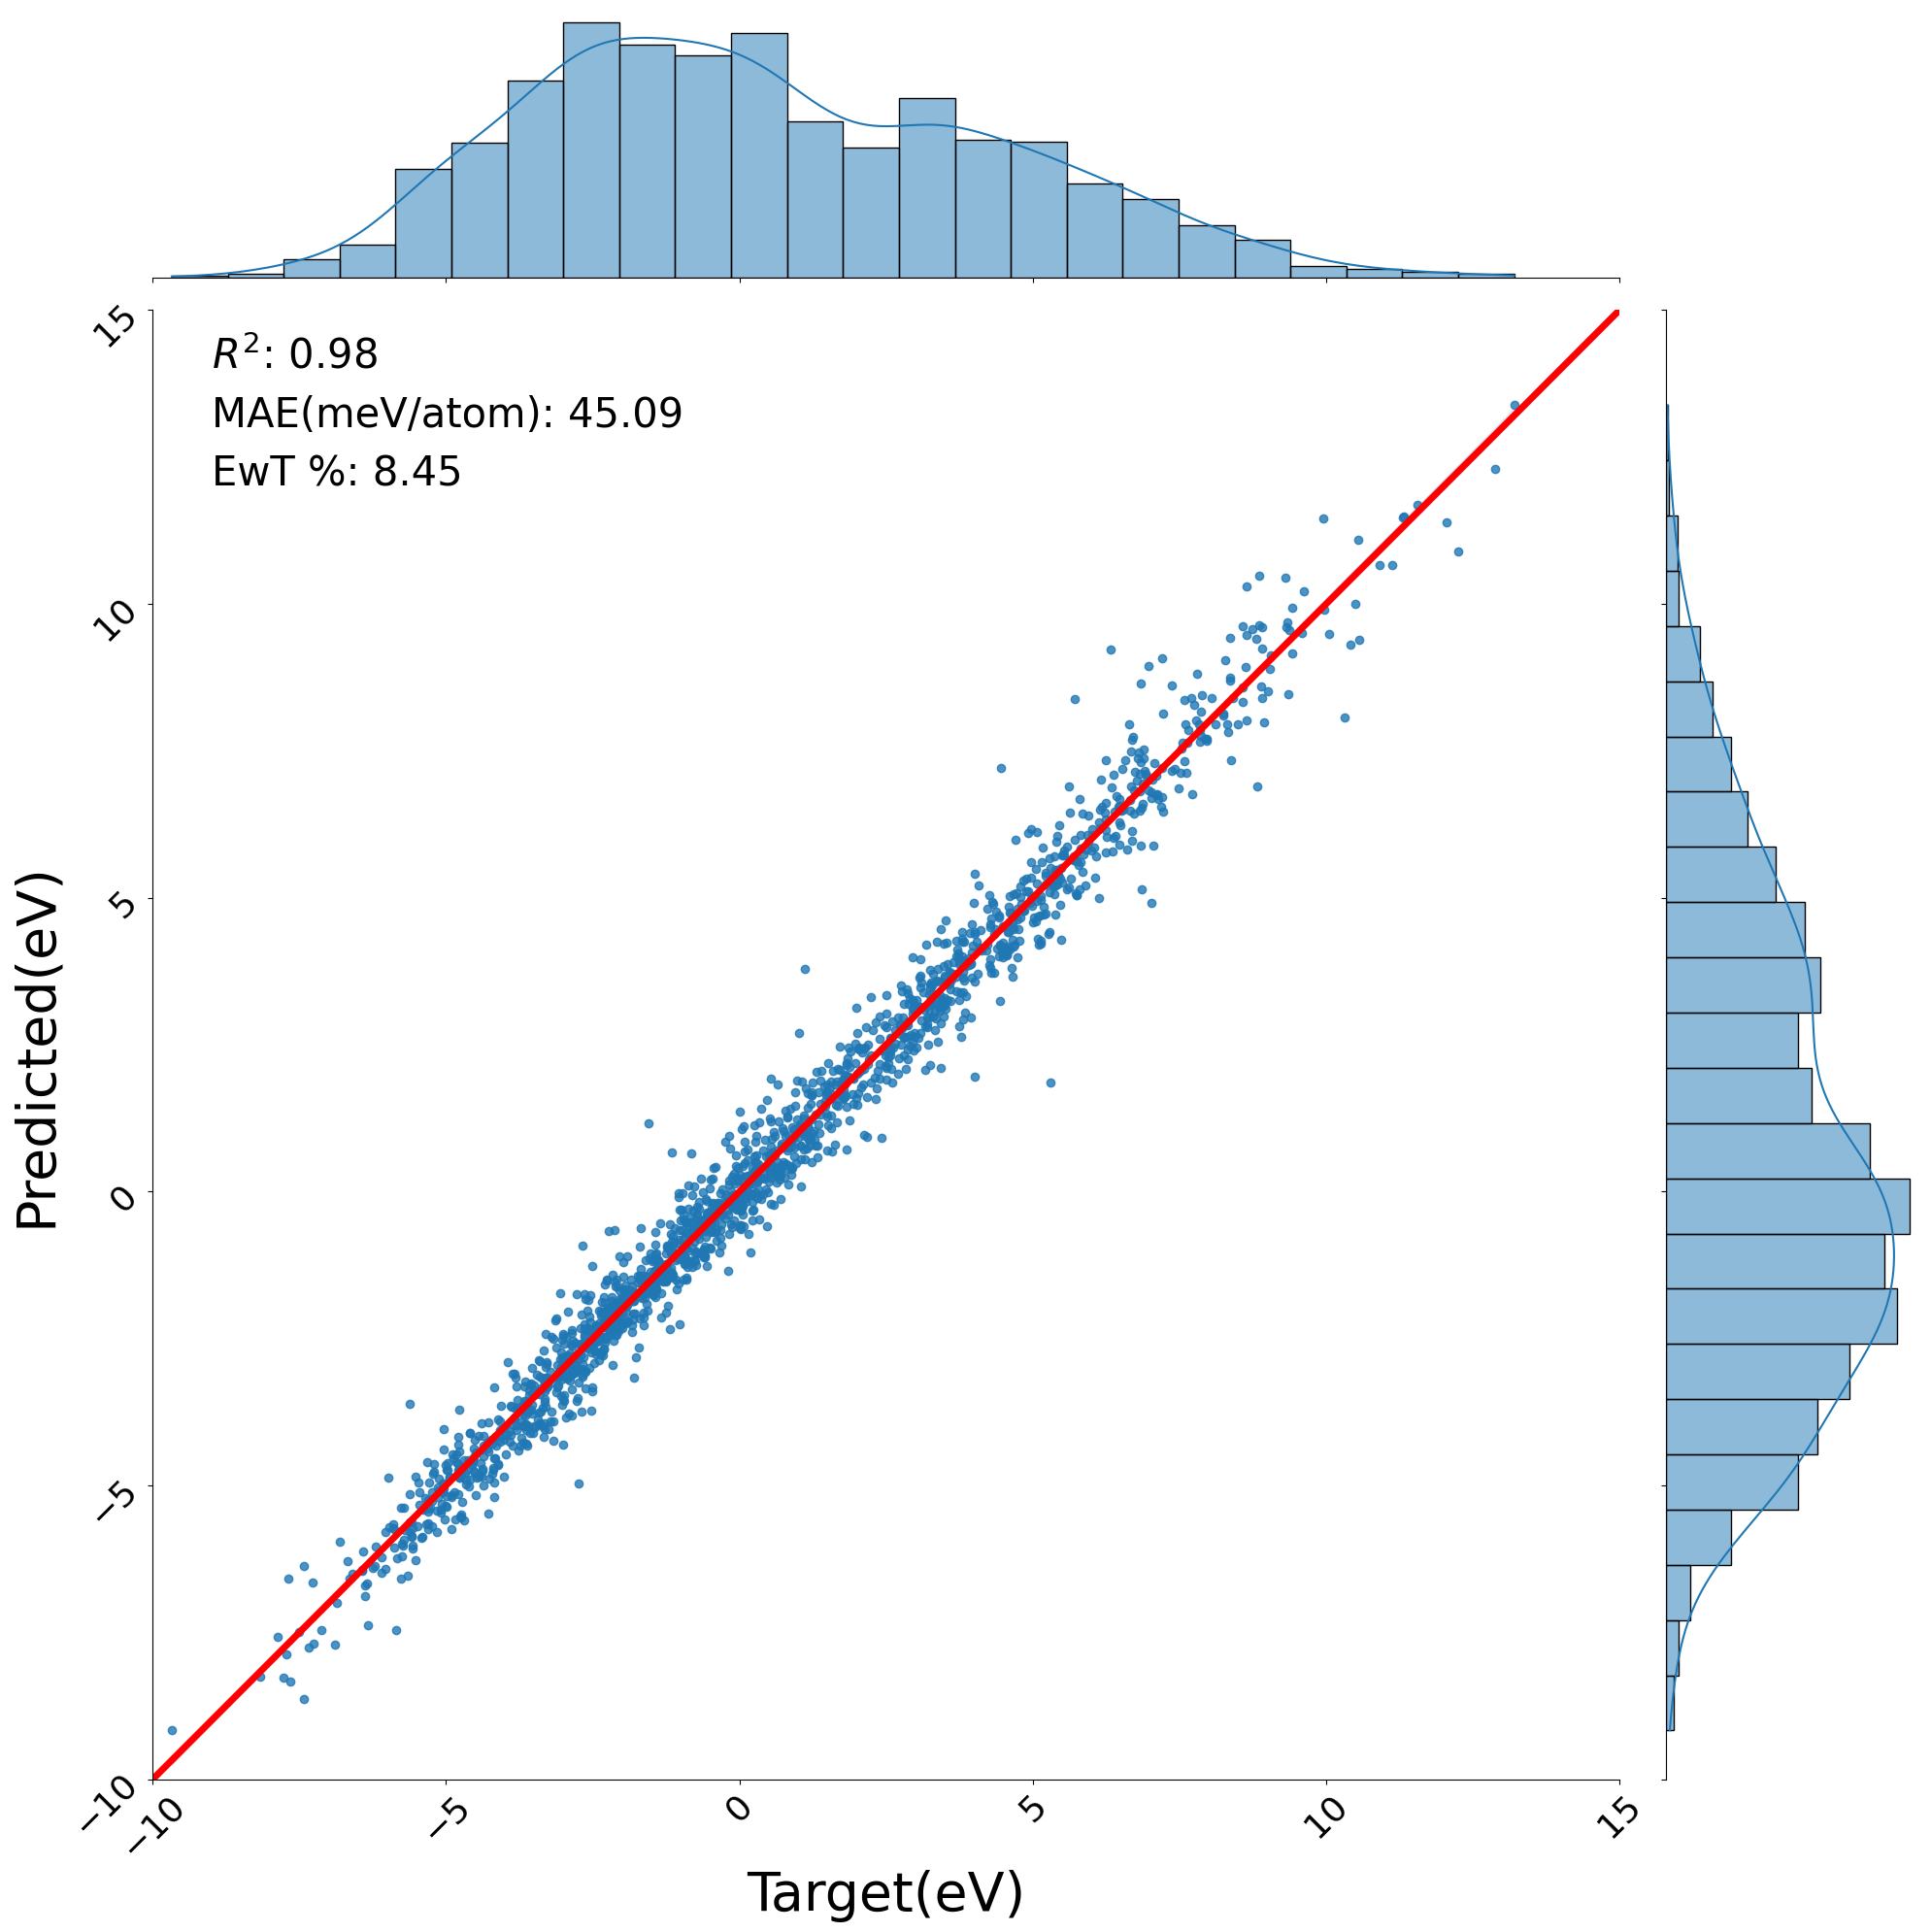

In [70]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="reg",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["qtaim_full"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)


plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["qtaim_full"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["qtaim_full"]["test_ewt_per"] * 100),
    fontsize=30,
)
# add title
plt.show()

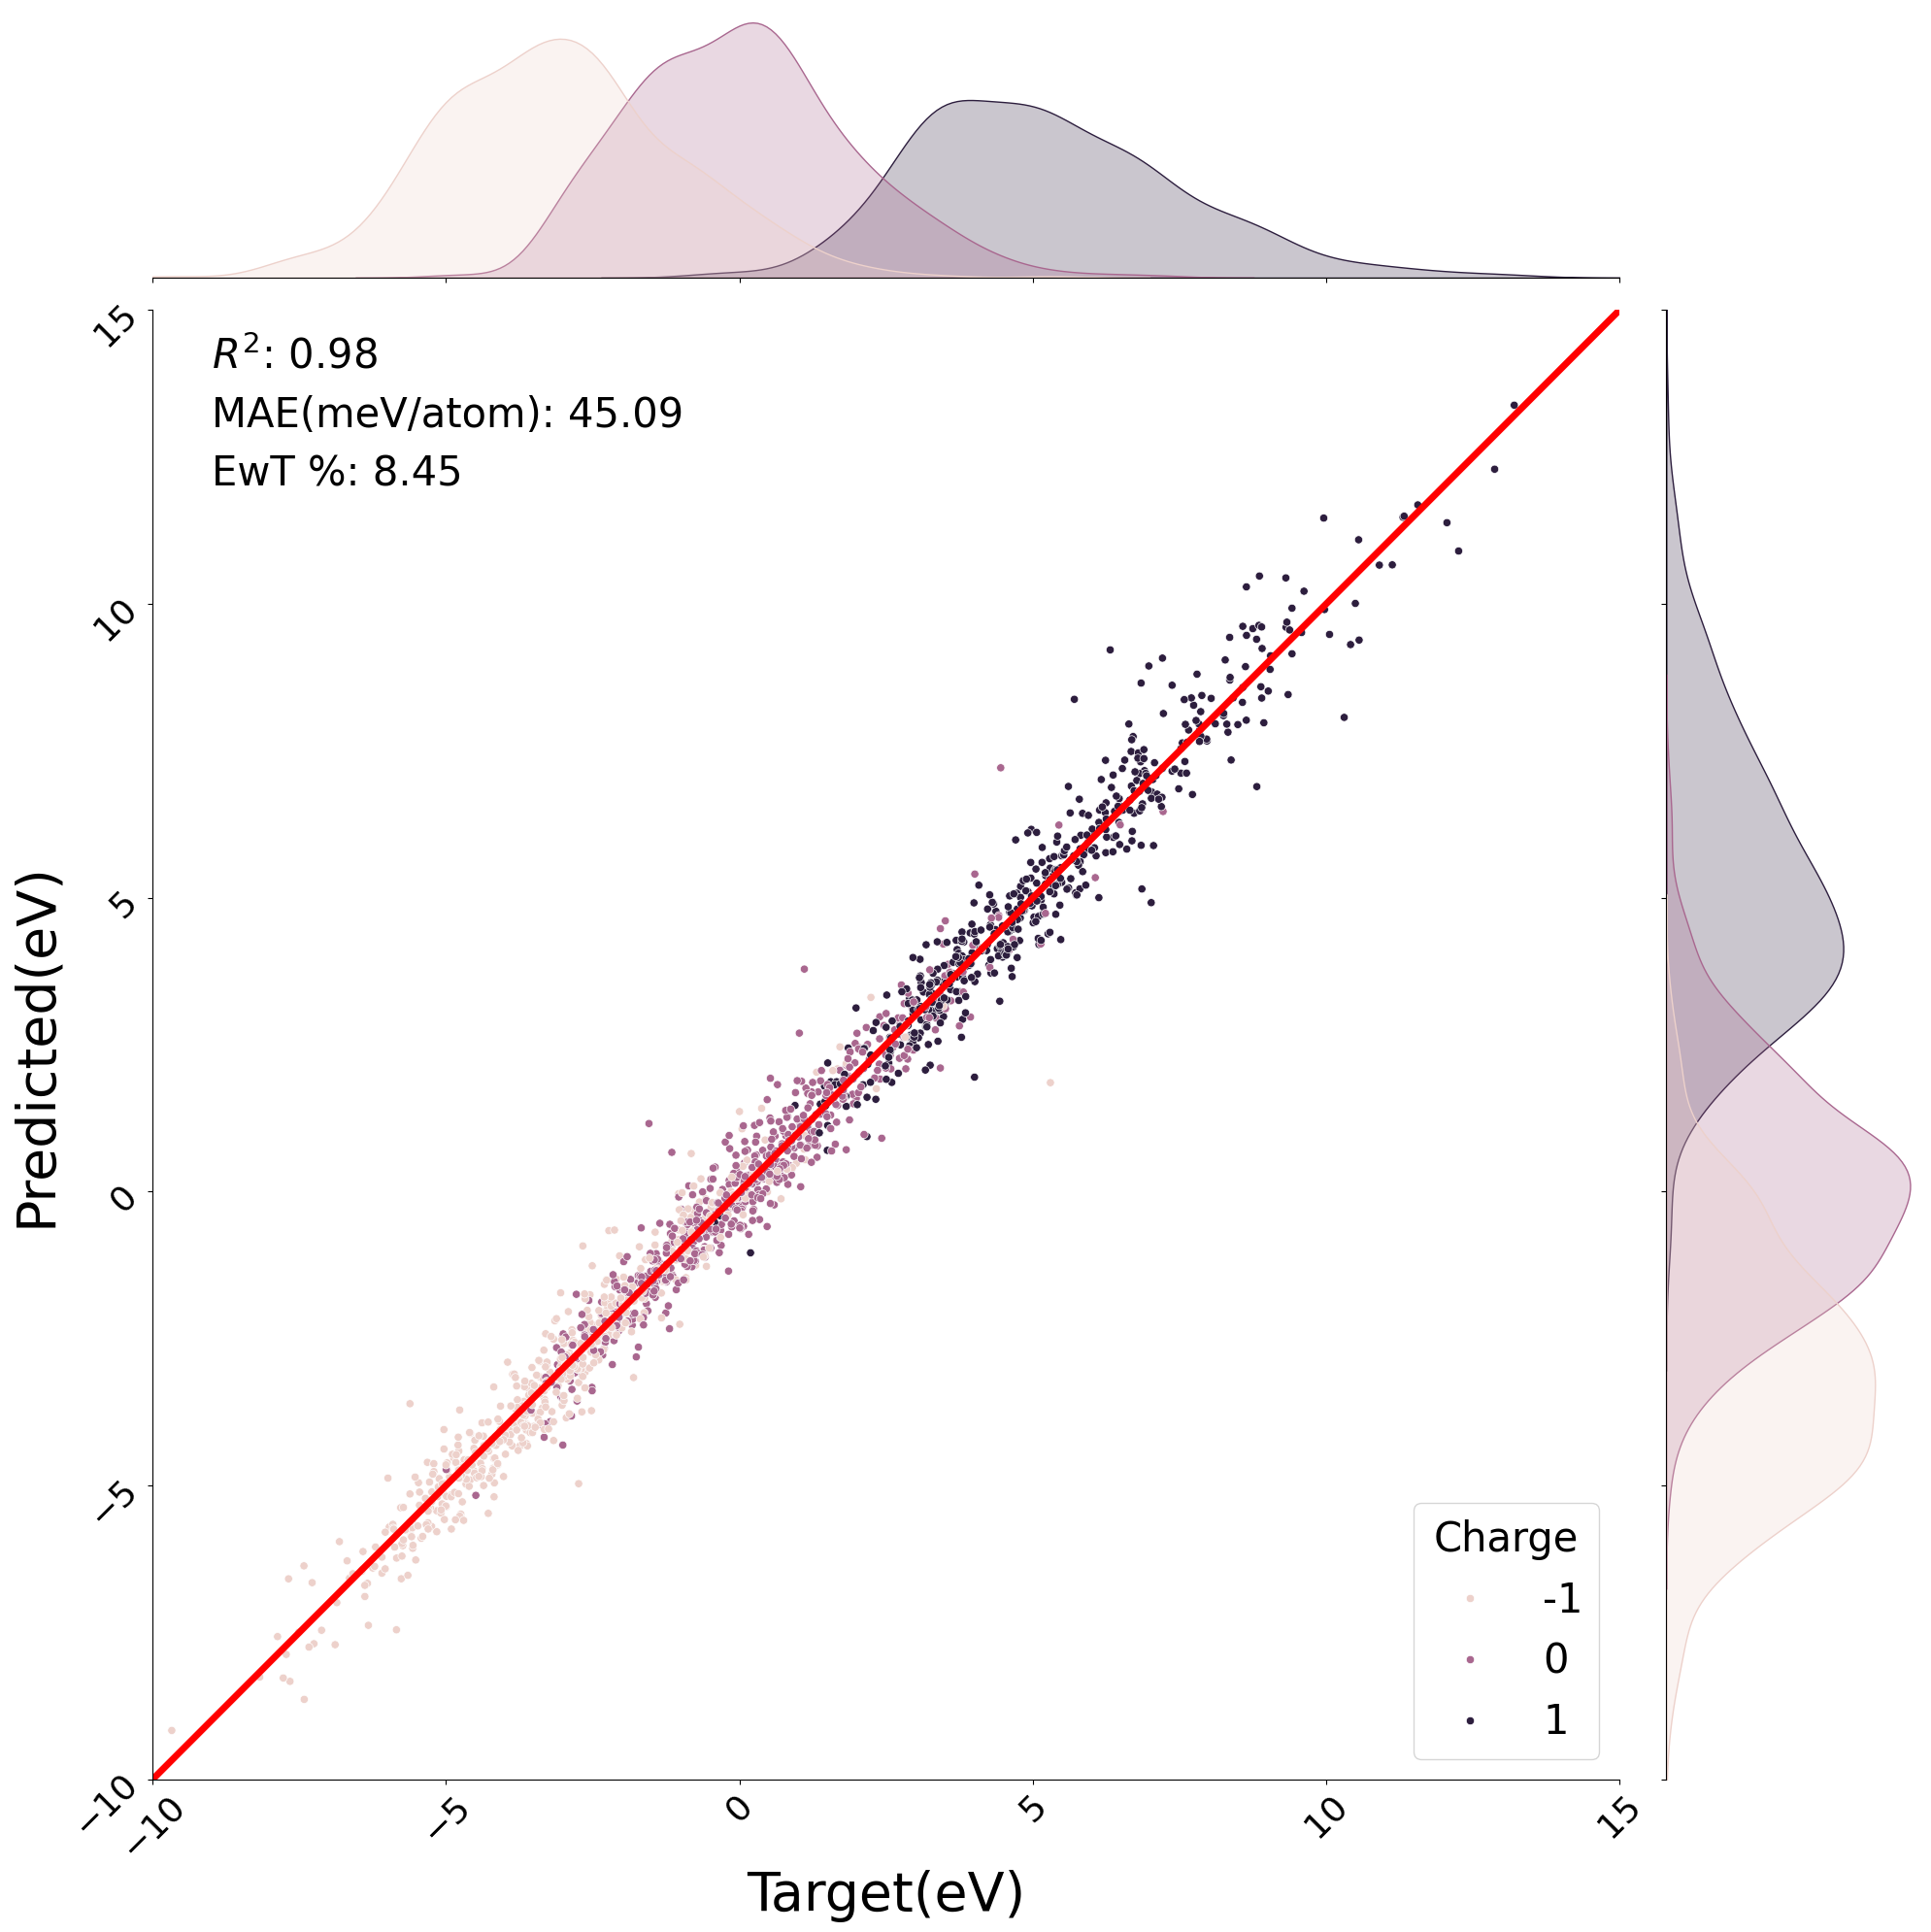

In [71]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    # kind="reg",
    hue="charge",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["qtaim_full"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)

plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["qtaim_full"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["qtaim_full"]["test_ewt_per"] * 100),
    fontsize=30,
)

#["test_ewt_per"] * 100
plt.legend(fontsize=30, loc="lower right", title="Charge", title_fontsize=30)
# add title
plt.show()

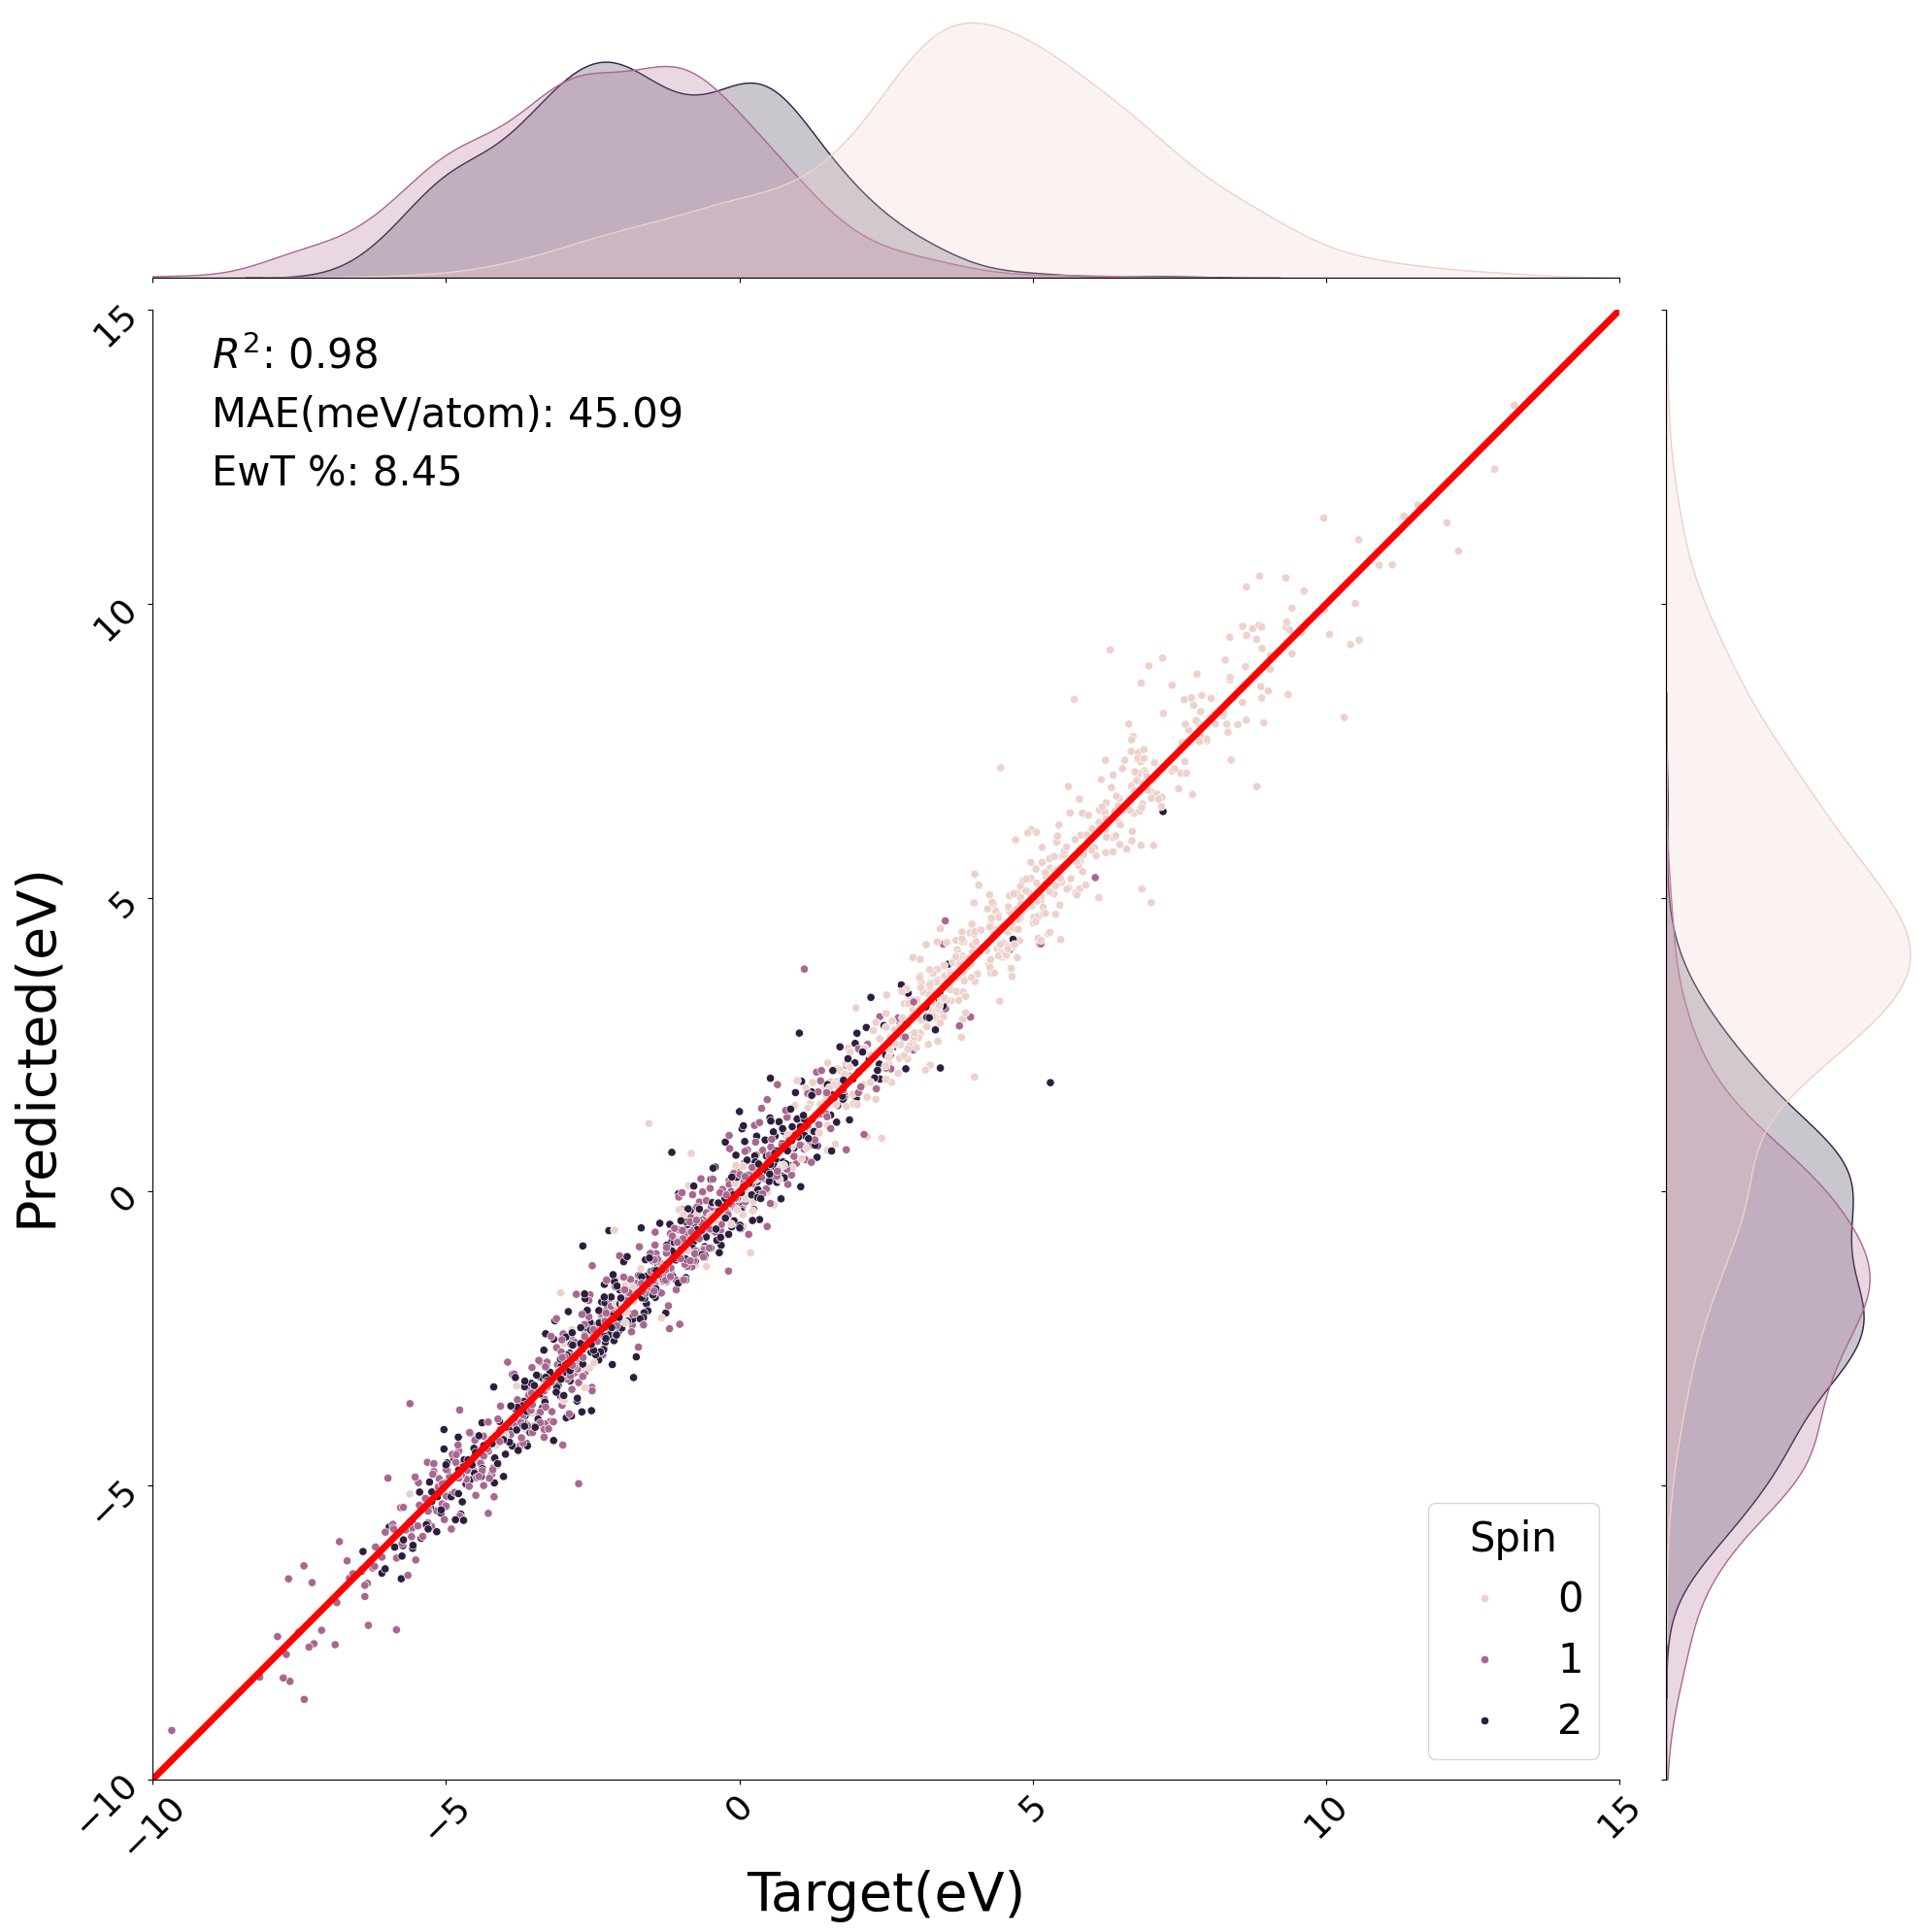

In [72]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    # kind="reg",
    hue="spin",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["qtaim_full"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)

plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["qtaim_full"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["qtaim_full"]["test_ewt_per"] * 100),
    fontsize=30,
)

#["test_ewt_per"] * 100
plt.legend(fontsize=30, loc="lower right", title="Spin", title_fontsize=30)
# add title
plt.show()

# non_qtaim


In [45]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, EarlyStopping

dataloader_train = DataLoaderMoleculeGraphTask(
    dataset_dict["base_train"], batch_size=256, shuffle=True, num_workers=0
)
dataloader_test = DataLoaderMoleculeGraphTask(
    dataset_dict["base_test"],
    batch_size=len(dataset_dict["base_test"].graphs),
    shuffle=False,
    num_workers=0,
)
early_stopping_callback = EarlyStopping(
    monitor="val_mae", min_delta=0.00, patience=100, verbose=False, mode="min"
)
lr_monitor = LearningRateMonitor(logging_interval="step")

trainer = pl.Trainer(
    max_epochs=1000,
    accelerator="gpu",
    gradient_clip_val=2.0,
    devices=1,
    accumulate_grad_batches=1,
    enable_progress_bar=True,
    callbacks=[
        early_stopping_callback,
        lr_monitor,
    ],
    enable_checkpointing=True,
    strategy="auto",
    # default_root_dir=model_save_string,
    default_root_dir="./test/",
    precision="bf16-mixed",
)
trainer.fit(model_temp_noqtaim, dataloader_train)
trainer.save_checkpoint(f"retrain_noqtaim_libe.ckpt")


Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/pytorch_lightning/trainer/configuration_validator.py:71: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

   | Name            | Type               | Params
--------------------------------------------------------
0  | activation      | ReLU               | 0     
1  | embedding       | UnifySize          | 1.7 K 
2  | conv_layers     | ModuleList         | 119 K 
3  | readout         | SumPoolingThenCat  | 0     
4  | loss            | MeanSquaredError   | 0     
5  | fc_layers       | ModuleList         | 243 K 
6  | train_r2        | MultioutputWrapper | 0     
7  | train_torch_l1  | MultioutputWra

Training: 0it [00:00, ?it/s]

Epoch 00027: reducing learning rate of group 0 to 9.4293e-03.
Epoch 00053: reducing learning rate of group 0 to 4.7146e-03.
Epoch 00079: reducing learning rate of group 0 to 2.3573e-03.
Epoch 00105: reducing learning rate of group 0 to 1.1787e-03.
Epoch 00131: reducing learning rate of group 0 to 5.8933e-04.
Epoch 00157: reducing learning rate of group 0 to 2.9466e-04.
Epoch 00183: reducing learning rate of group 0 to 1.4733e-04.


In [48]:
from qtaim_embed.models.utils import test_and_predict_libe

val_results = test_and_predict_libe(
    dataset_dict["base_test"], dataset_dict["base_train"], model_temp_noqtaim
)

data_test_loader = DataLoaderMoleculeGraphTask(
    dataset_dict["base_test"],
    batch_size=len(dataset_dict["base_test"].graphs),
    shuffle=False,
)
batch_graph, batched_labels = next(iter(data_test_loader))
(
    mean_mae_test,
    mean_rmse_test,
    ewt_prop_test,
    _,
    _,
) = model_temp_noqtaim.evaluate_manually(
    batch_graph=batch_graph,
    batch_label=batched_labels,
    scaler_list=dataset_dict["base_train"].label_scalers,
    per_atom=True,
)


str_dataset = "base"
results_dict = {"base": {}}
results_dict[str_dataset]["test_r2"] = val_results["statistics_dict"]["test"]["r2"]
results_dict[str_dataset]["test_preds"] = val_results["preds_test"]
results_dict[str_dataset]["test_labels"] = val_results["label_list"]
results_dict[str_dataset]["train_preds"] = val_results["preds_train"]
results_dict[str_dataset]["train_labels"] = val_results["label_list_train"]
results_dict[str_dataset]["statistics_dict"] = val_results["statistics_dict"]
results_dict[str_dataset]["test_mae_per"] = mean_mae_test
results_dict[str_dataset]["test_mse_per"] = mean_rmse_test
results_dict[str_dataset]["test_ewt_per"] = ewt_prop_test

results_dict[str_dataset]["charge_list_test"] = val_results["charge_list_test"]
results_dict[str_dataset]["spin_list_test"] = val_results["spin_list_test"]
results_dict[str_dataset]["charge_list_train"] = val_results["charge_list_train"]
results_dict[str_dataset]["spin_list_train"] = val_results["spin_list_train"]


df_test, df_train = get_test_train_preds_as_df(results_dict, "base")


----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.9659	 mae: 0.5722	 mse: 0.7473
Performance test set:	 r2: 0.9487	 mae: 0.6714	 mse: 0.8982
----------------------------------------------------------------------------------------------------


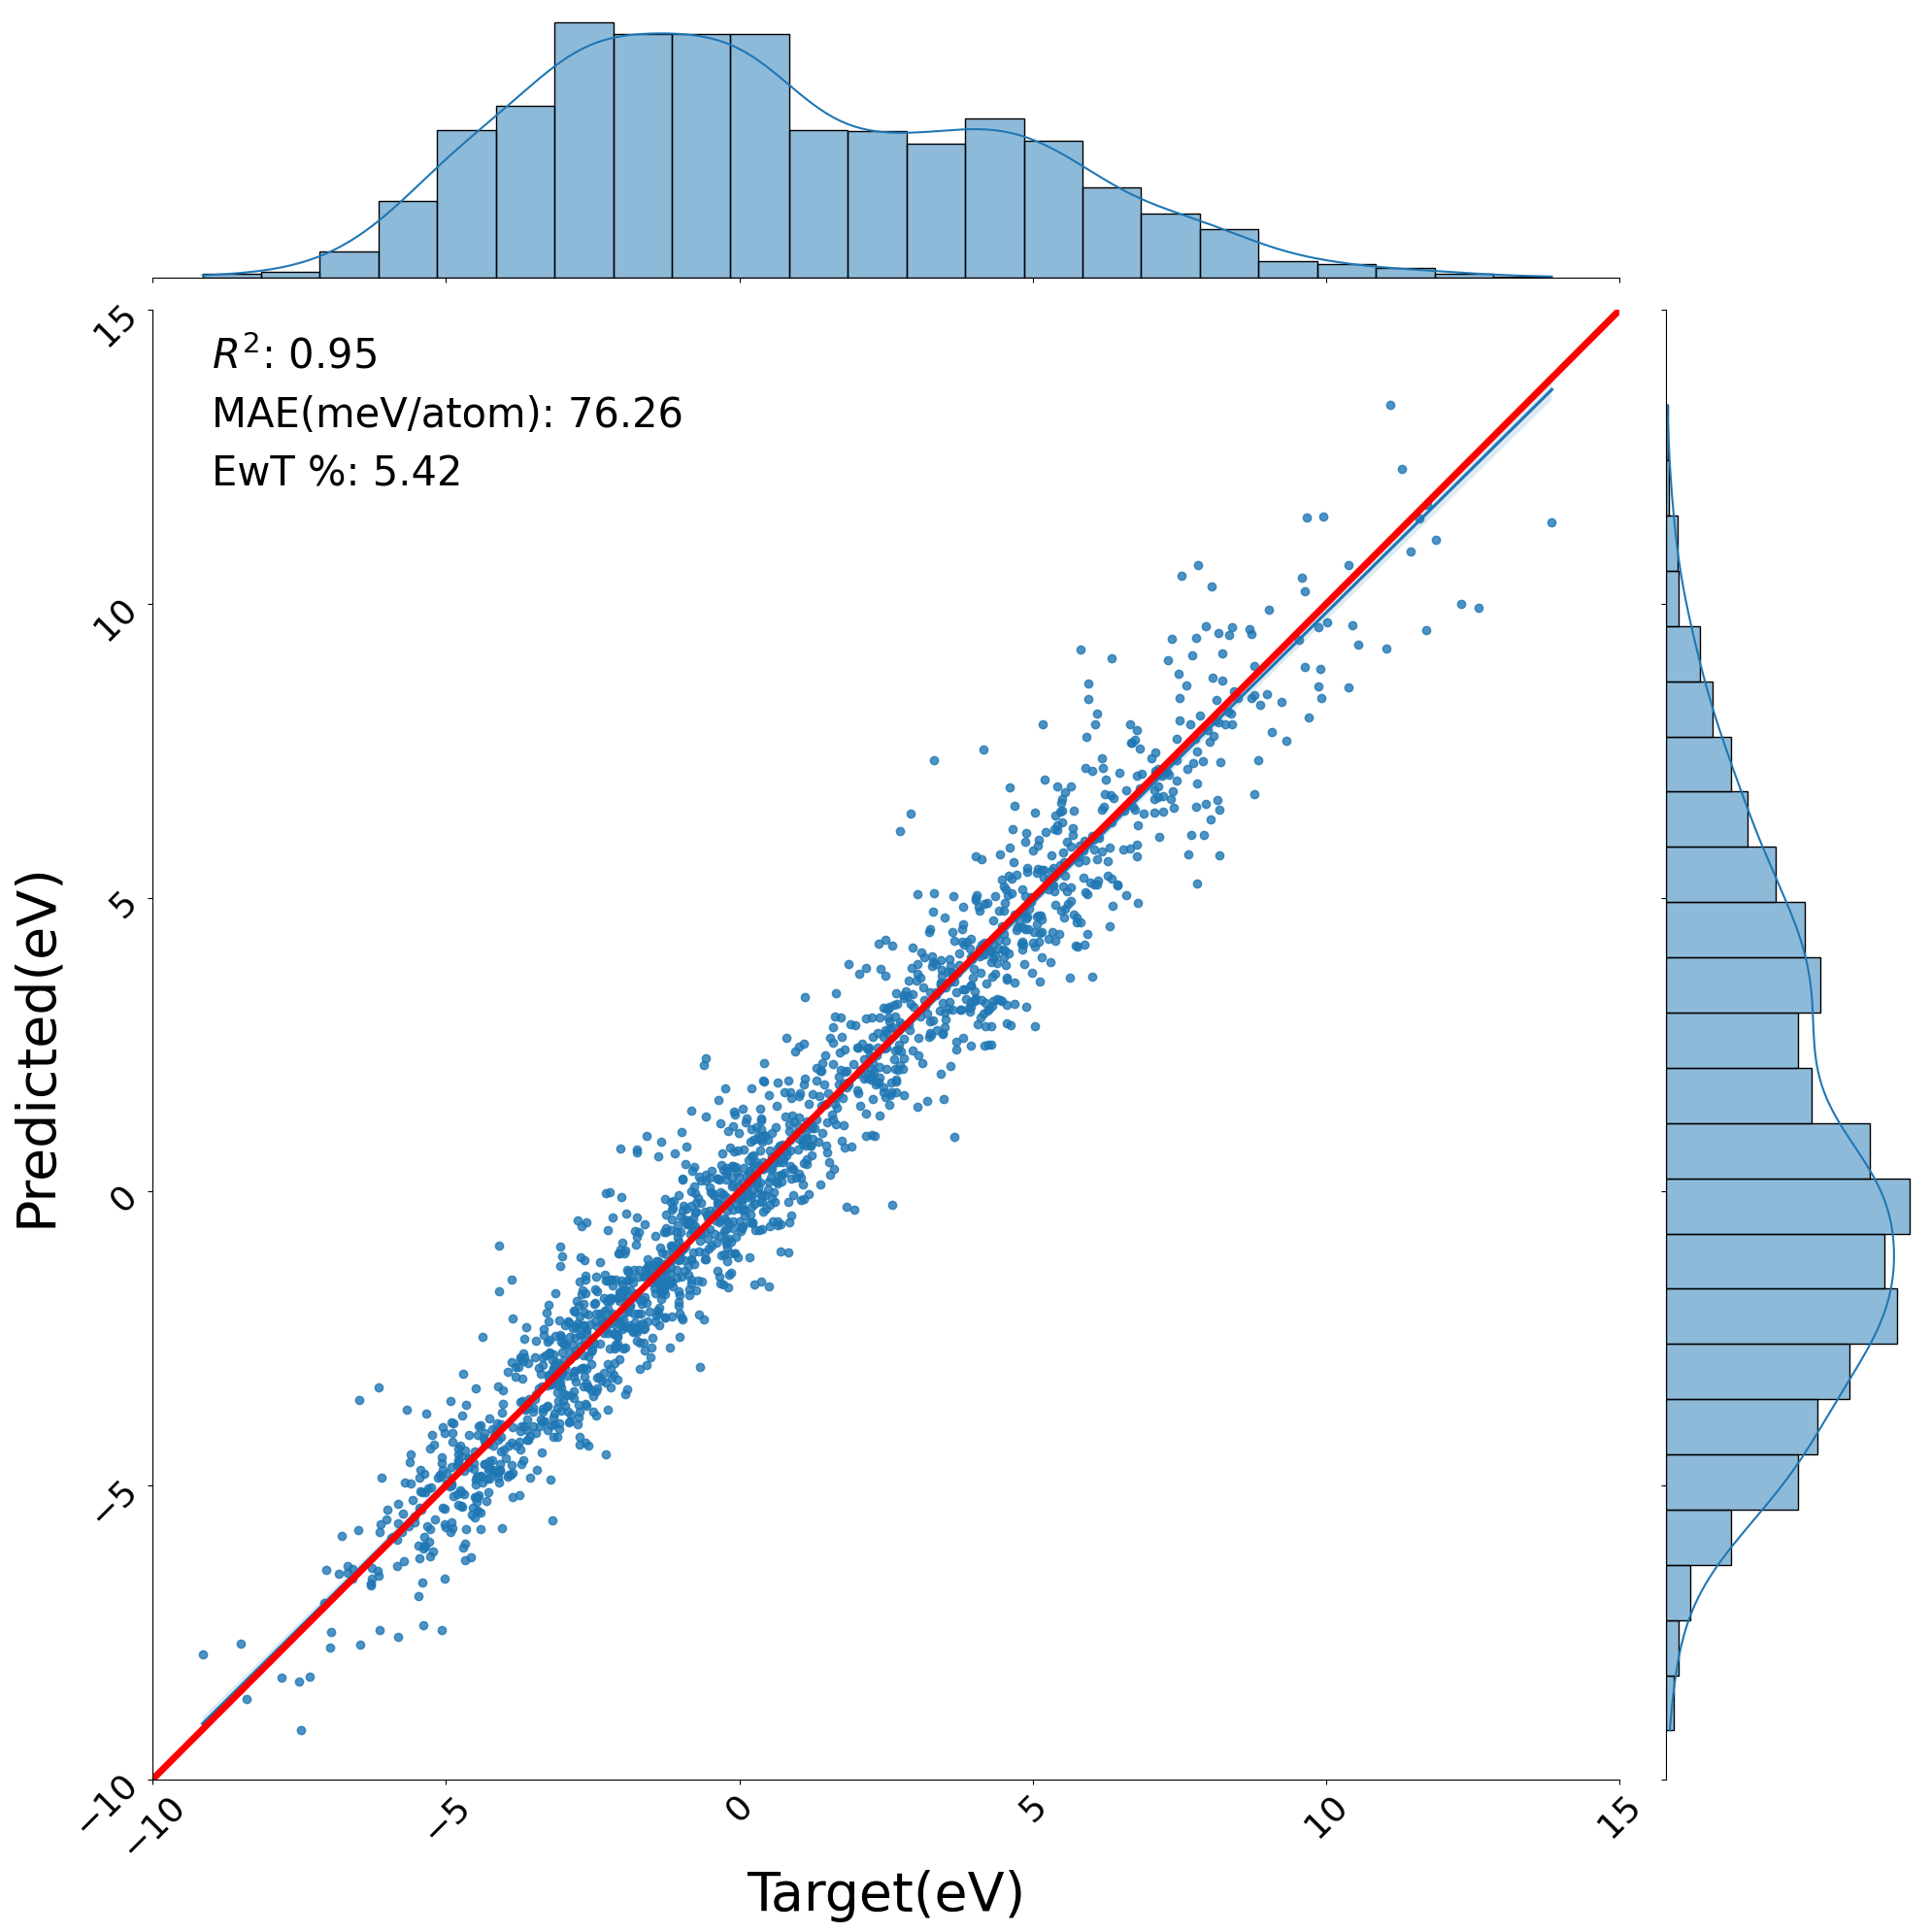

In [49]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="reg",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["base"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)


plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["base"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["base"]["test_ewt_per"] * 100),
    fontsize=30,
)
#plt.title("QTAIML(No QTAIM) Best Performance")
# add title
plt.show()


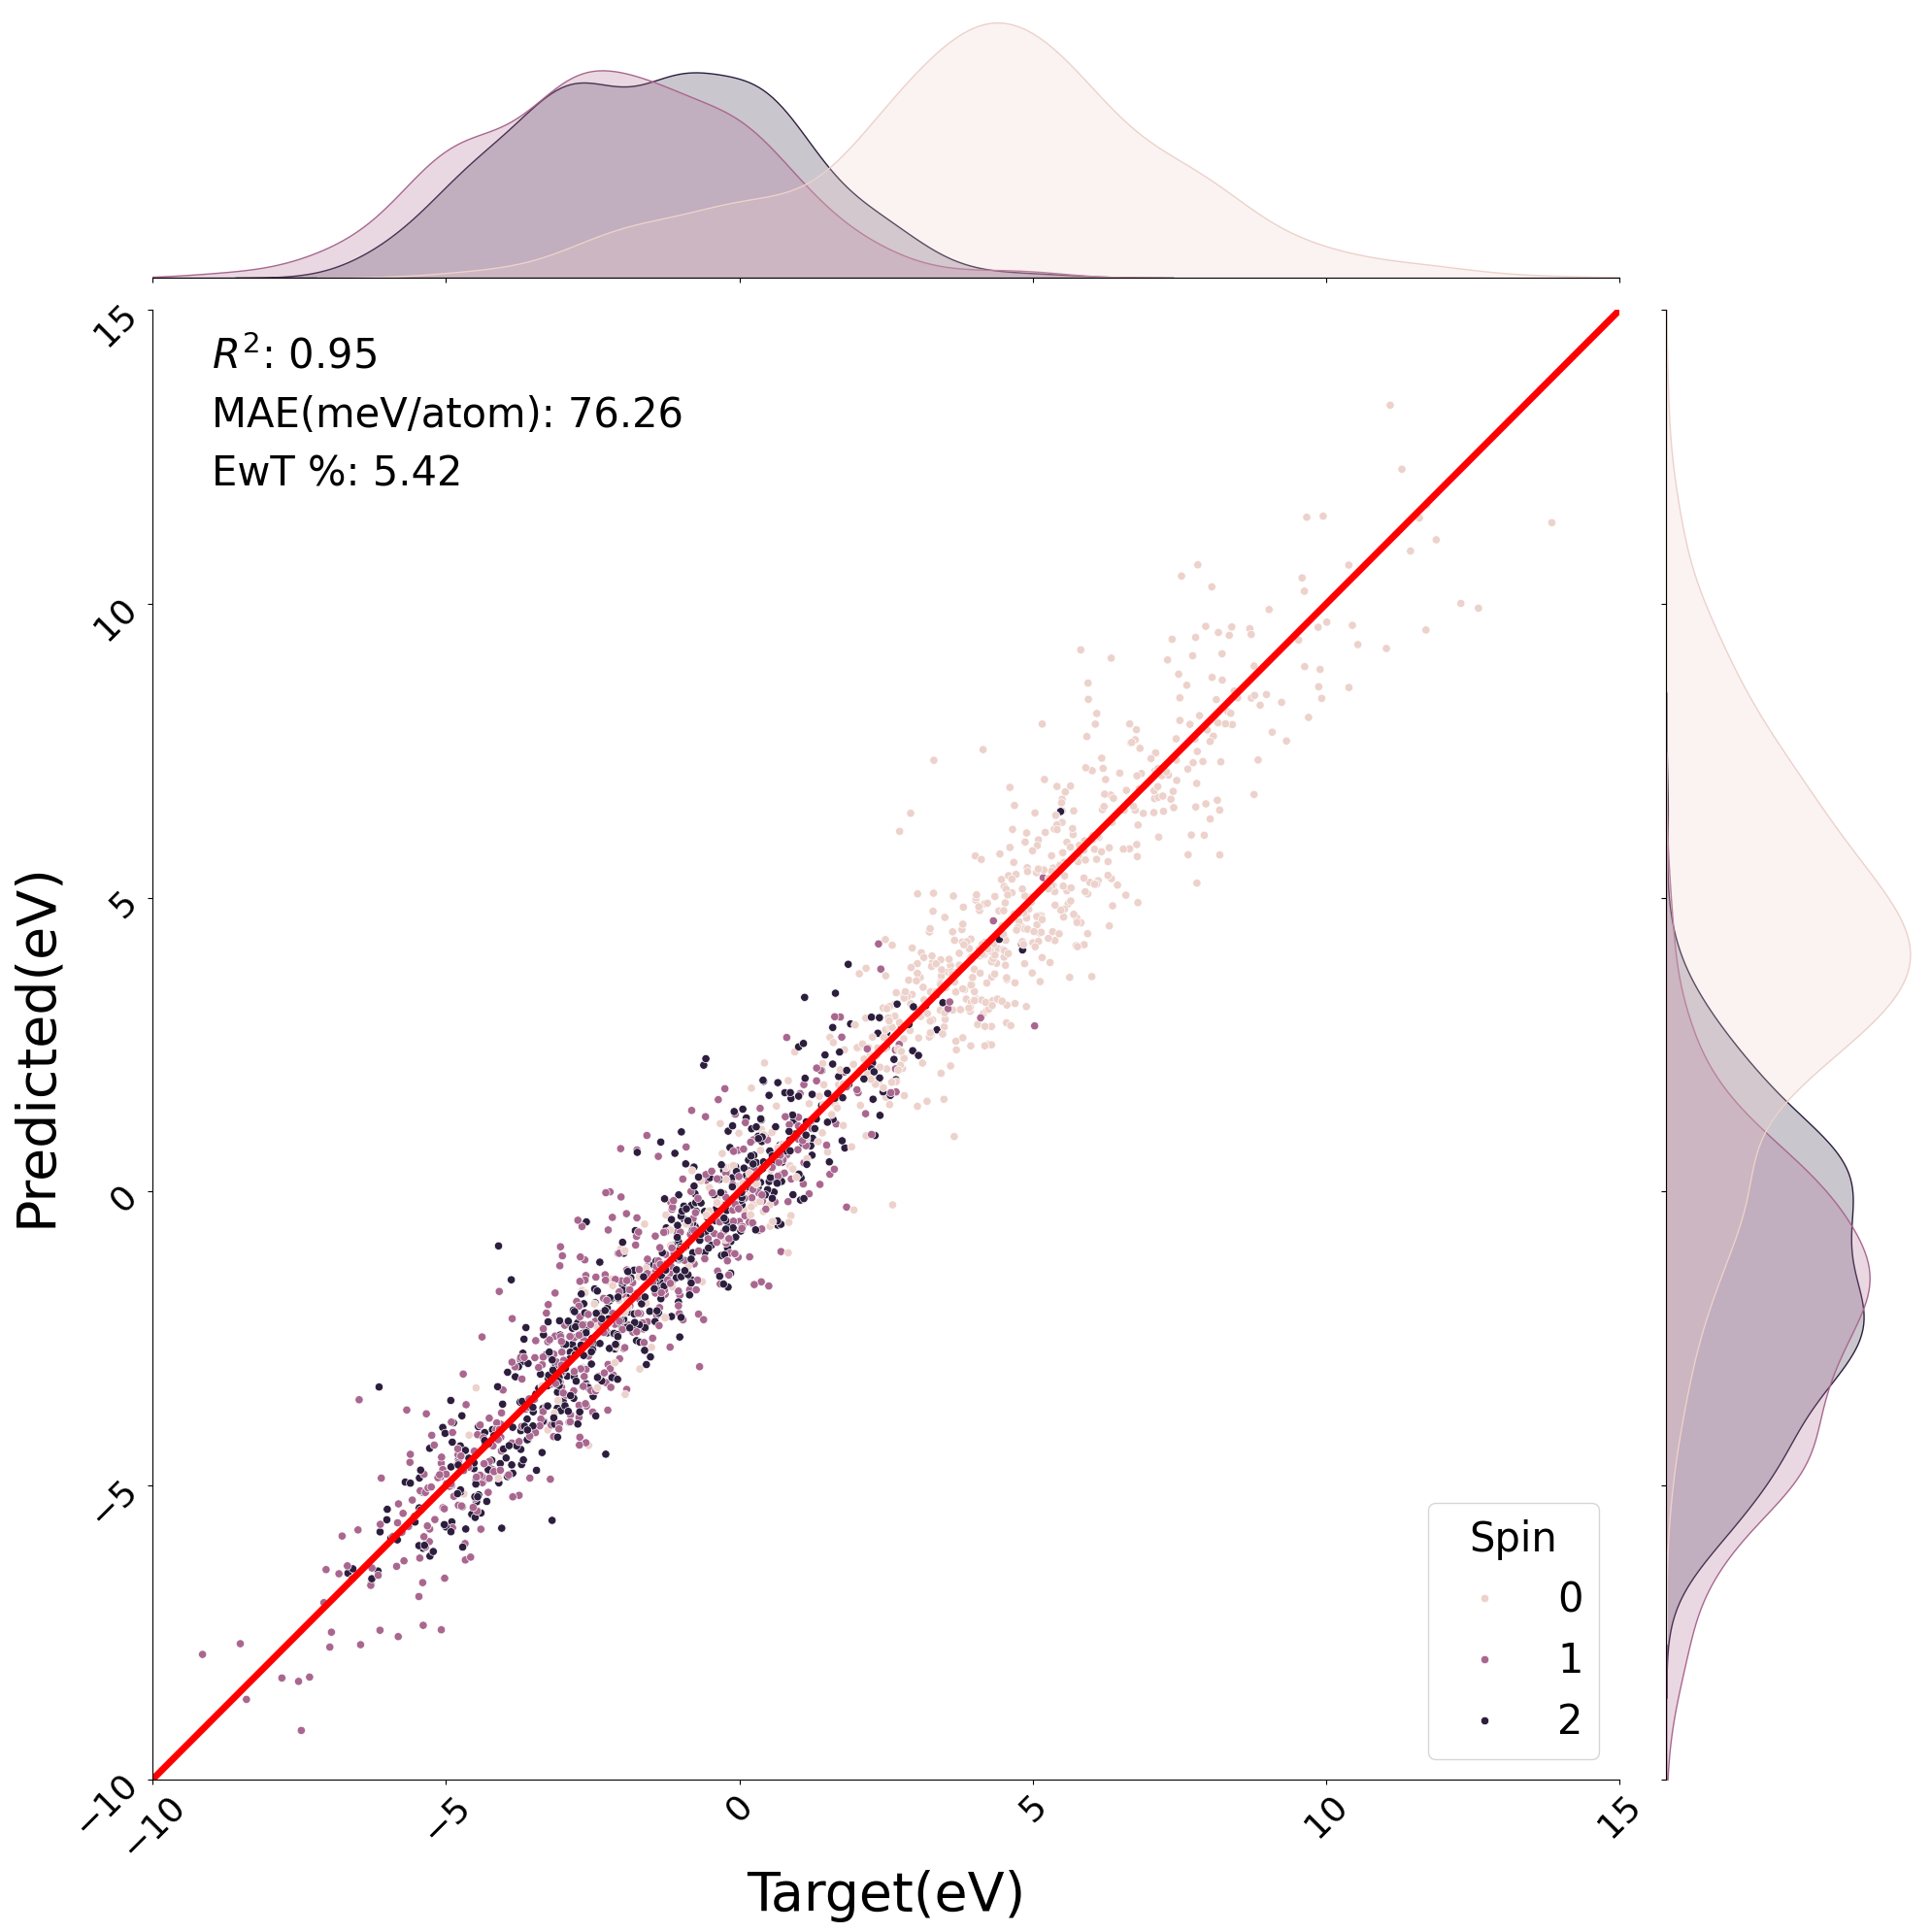

In [50]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    # kind="reg",
    hue="spin",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["base"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)

plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["base"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["base"]["test_ewt_per"] * 100),
    fontsize=30,
)

#["test_ewt_per"] * 100
plt.legend(fontsize=30, loc="lower right", title="Spin", title_fontsize=30)
# add title
plt.show()

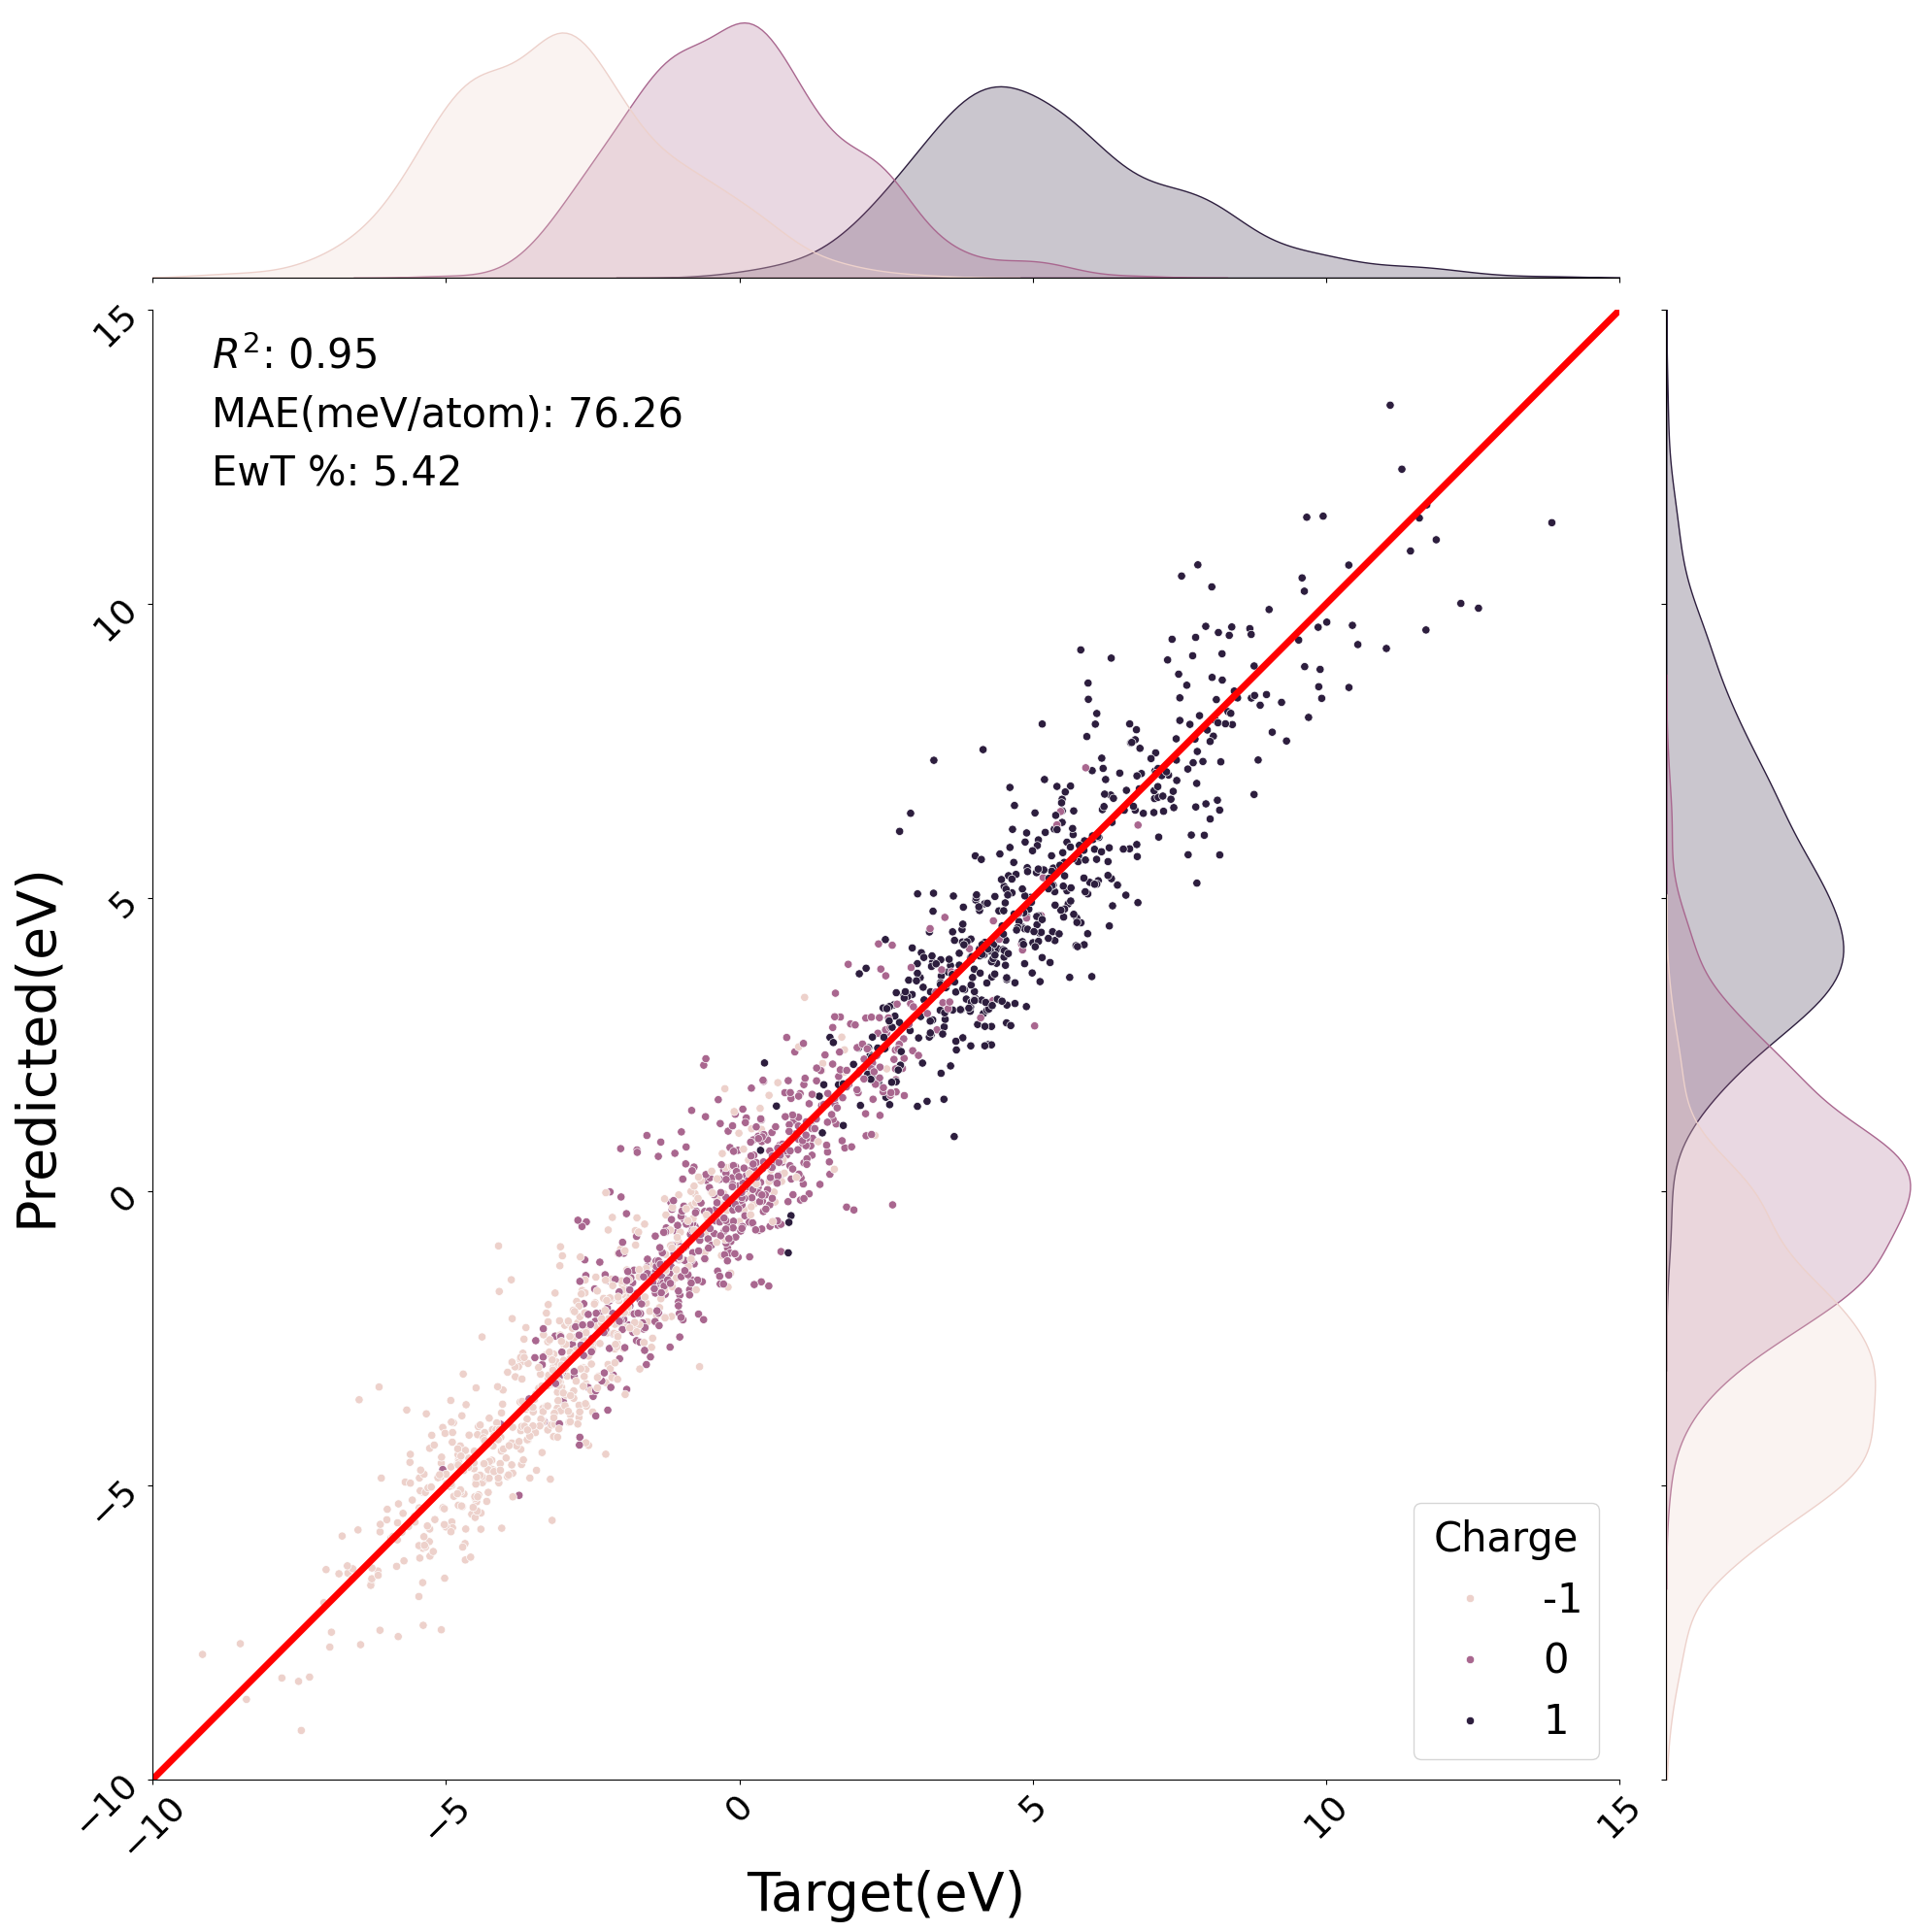

In [51]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    # kind="reg",
    hue="charge",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["base"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)

plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["base"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["base"]["test_ewt_per"] * 100),
    fontsize=30,
)

#["test_ewt_per"] * 100
plt.legend(fontsize=30, loc="lower right", title="Charge", title_fontsize=30)
# add title
plt.show()